In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
import numpy
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#USING CROSS VALIDATION
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression

In [2]:
'''
load CSV
'''
hdp = pd.read_csv('Heart_Disease_Prediction.csv',encoding = "ISO-8859-1")
hdp.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [3]:
hdp.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
hdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
hdp.describe()
hdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
'''
missing data
'''
hdp.isna().any()

Age                        False
Sex                        False
Chest pain type            False
BP                         False
Cholesterol                False
FBS over 120               False
EKG results                False
Max HR                     False
Exercise angina            False
ST depression              False
Slope of ST                False
Number of vessels fluro    False
Thallium                   False
Heart Disease              False
dtype: bool

<AxesSubplot:>

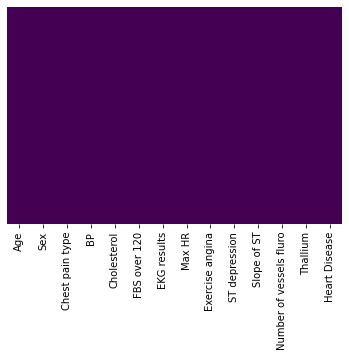

In [7]:
sns.heatmap(hdp.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [8]:
# identificar todos os dados categóricos
cat_columns = hdp.select_dtypes(['object']).columns
print(cat_columns)

Index(['Heart Disease'], dtype='object')


In [9]:
# trnasformar dados categóricos em numéricos
hdp[cat_columns] = hdp[cat_columns].apply(lambda x: pd.factorize(x)[0])

In [10]:
#decision tree classifier
#creating x (input data) and y (target feature - the Heart Disease feature)
x = hdp.drop(['Heart Disease'], axis = 1) #input features - everything except the Heart Disease feature
y = hdp['Heart Disease'].to_frame() #target feature

In [11]:
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [12]:
y

,Heart Disease
0,0
1,1
2,0
3,1
4,1
...,...
265,1
266,1
267,1
268,1


In [13]:
# train/test slipt
# usar x e y que contém 270 linhas de data para criar train e test sets de data
# Importante -> Definir a random_state para reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2021)

In [14]:
print("The sape of x %s. x_train has shape %s while x_test has shape %s" %(x.shape, x_train.shape, x_test.shape))

The sape of x (270, 13). x_train has shape (202, 13) while x_test has shape (68, 13)


In [15]:
print("The sape of y %s. y_train has shape %s while y_test has shape %s" %(y.shape, y_train.shape, y_test.shape))

The sape of y (270, 1). y_train has shape (202, 1) while y_test has shape (68, 1)


In [16]:
clf = DecisionTreeClassifier(random_state = 2021)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
# confusion matrix-based metrics 
confusion_matrix(y_test, predictions)

array([[20,  9],
       [16, 23]])

In [17]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.63 accuracy


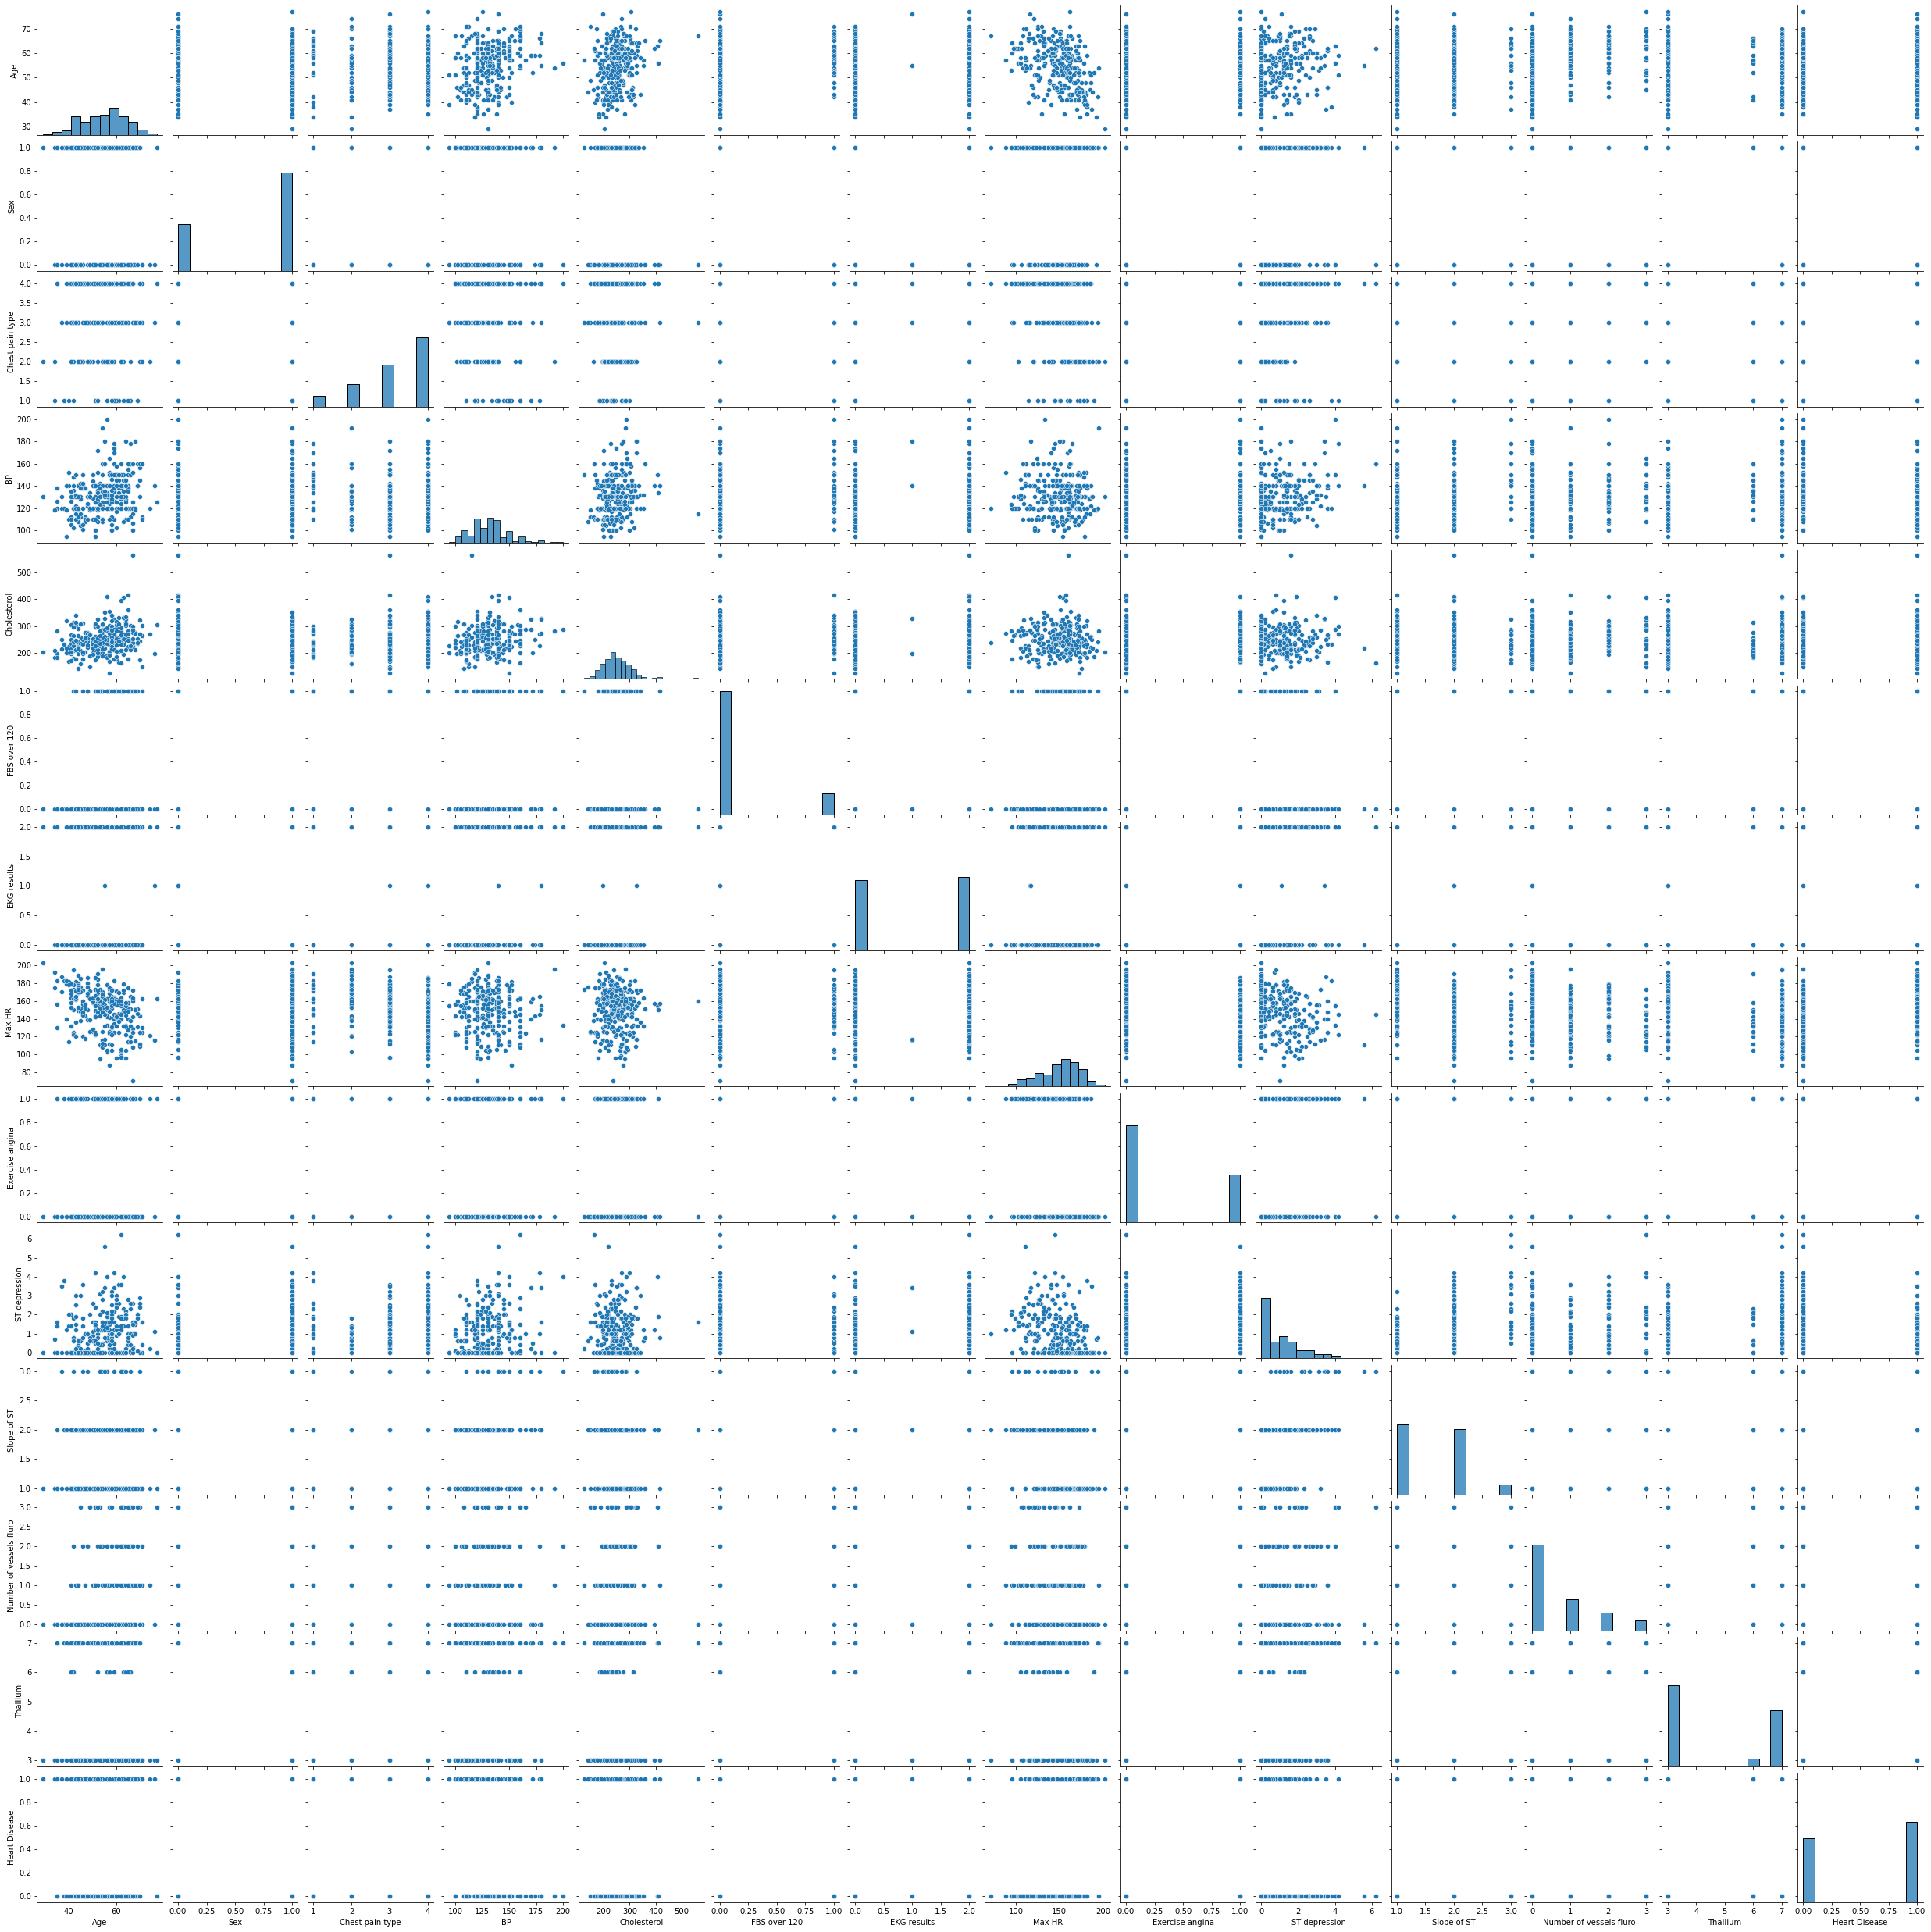

In [18]:
sns.pairplot(hdp)

/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Heart Disease', ylabel='Density'>

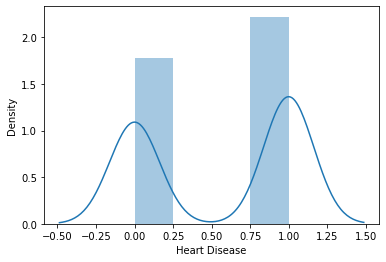

In [19]:
sns.distplot(hdp['Heart Disease'])

<AxesSubplot:>

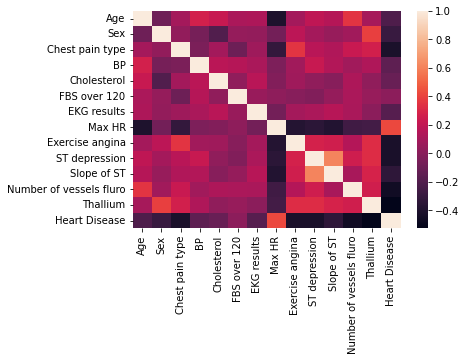

In [20]:
sns.heatmap(hdp.corr())

In [21]:
x = np.array(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'])
y = np.array(['Heart Disease'])

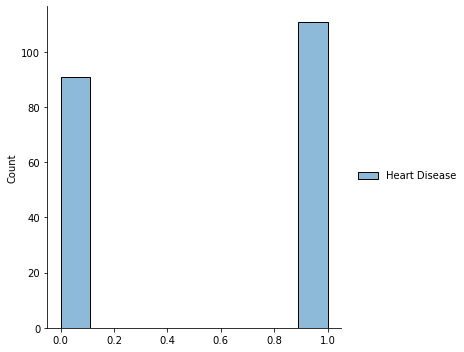

In [22]:
sns.displot(y_train)

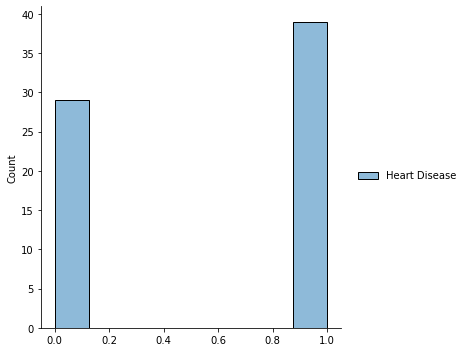

In [23]:
sns.displot(y_test)

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

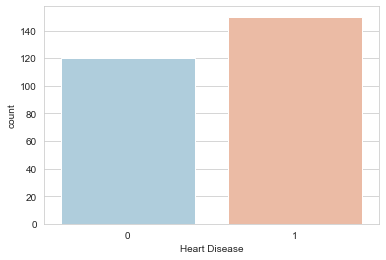

In [24]:
sns.set_style('whitegrid')
sns.countplot(x = 'Heart Disease', data = hdp, palette = 'RdBu_r')

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

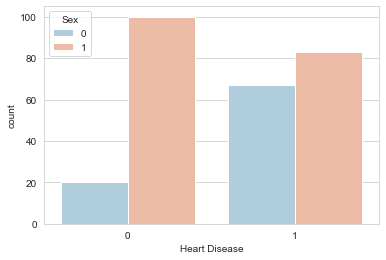

In [25]:
sns.set_style('whitegrid')
sns.countplot(x = 'Heart Disease', hue = 'Sex', data = hdp, palette = 'RdBu_r')

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

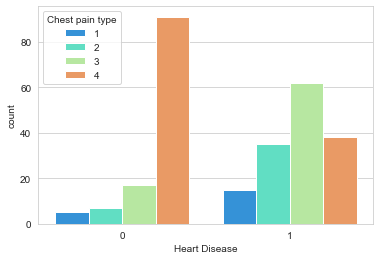

In [26]:
sns.set_style('whitegrid')
sns.countplot(x = 'Heart Disease', hue = 'Chest pain type', data = hdp, palette = 'rainbow')

/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

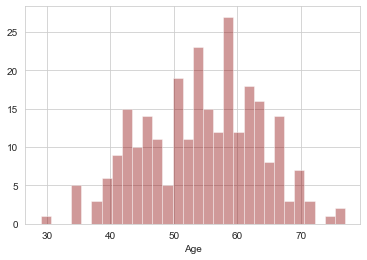

In [27]:
sns.distplot(hdp['Age'].dropna(), kde = False, color = 'darkred', bins = 30)

<AxesSubplot:>

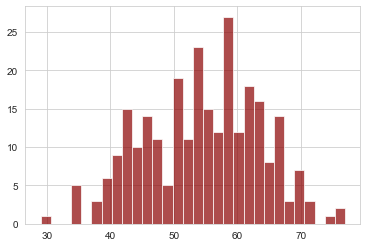

In [28]:
hdp['Age'].hist(bins = 30, color = 'darkred', alpha = 0.7)

<AxesSubplot:xlabel='Exercise angina', ylabel='count'>

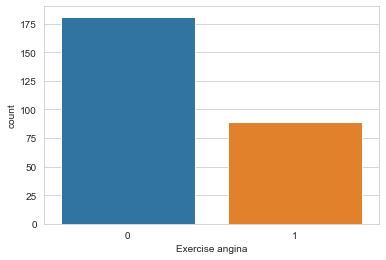

In [29]:
sns.countplot(x = 'Exercise angina', data = hdp)

<AxesSubplot:>

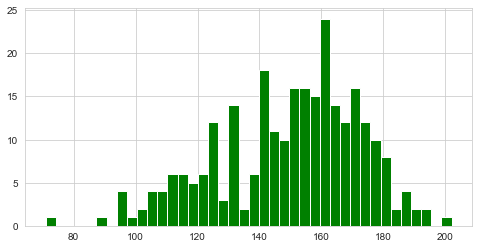

In [30]:
hdp['Max HR'].hist(color = 'green', bins = 40, figsize = (8,4))

<AxesSubplot:xlabel='Chest pain type', ylabel='Age'>

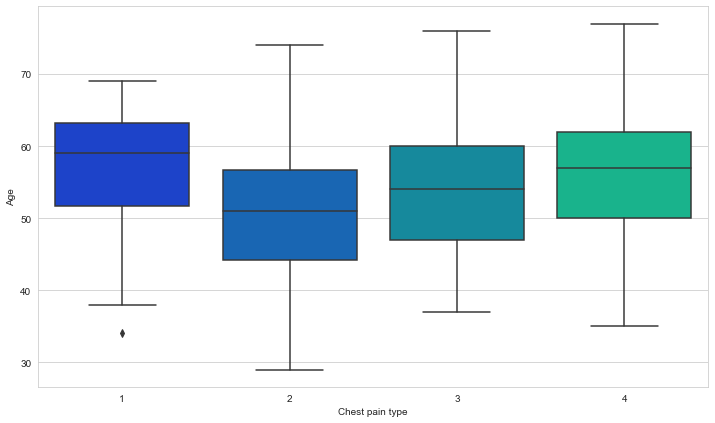

In [31]:
plt.figure(figsize = (12,7))
sns.boxplot(x = 'Chest pain type', y = 'Age', data = hdp, palette = 'winter')

In [32]:
def inpute_age(cols):
    Age = cols[0]
    Cpt = cols[1]
    
    if pd.isnull(Age):
        
        if Cpt == 1:
            return 37
        
        elif Cpt == 2:
            return 29
        
        else:
            return 24
    
    else:
        return Age

In [33]:
hdp['Age'] = hdp[['Age','Chest pain type']].apply(inpute_age, axis = 1)

<AxesSubplot:>

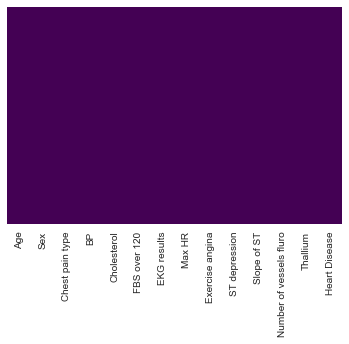

In [34]:
sns.heatmap(hdp.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [35]:
# identificar todos os dados categóricos
cat_columns = list(hdp.select_dtypes(['object']).columns)
print(cat_columns)

[]


In [36]:
x_train, x_test, y_train, y_test = train_test_split(hdp.drop('Heart Disease', axis = 1), hdp['Heart Disease'], test_size = 0.30, random_state = 101)

logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

In [37]:
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
predictions = logmodel.predict(x_test)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        40
           1       0.81      0.95      0.88        41

    accuracy                           0.86        81
   macro avg       0.88      0.86      0.86        81
weighted avg       0.88      0.86      0.86        81



/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


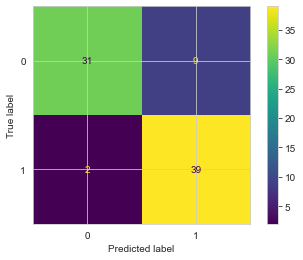

In [40]:
#Get the confusion matrix
plot_confusion_matrix(logmodel, x_test, y_test)
plt.show()

In [41]:
hdp.keys()

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [42]:
model = SVC(random_state = 2021)

In [43]:
model.fit(x_train, y_train)

SVC(random_state=2021)

In [44]:
predictions = model.predict(x_test)

In [45]:
print("%0.2f accuracy" % (accuracy_score(y_test, predictions)))

0.64 accuracy


/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


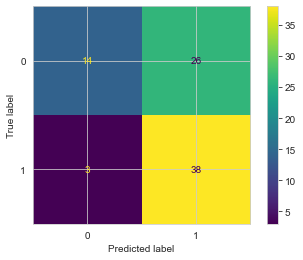

In [46]:
plot_confusion_matrix(model, x_test, y_test)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.35      0.49        40
           1       0.59      0.93      0.72        41

    accuracy                           0.64        81
   macro avg       0.71      0.64      0.61        81
weighted avg       0.71      0.64      0.61        81



In [48]:
param_grid = {'C': [0.1,1,10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [49]:
grid = GridSearchCV(SVC(random_state = 2021), param_grid, refit = True, verbose = 3)

In [50]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.568 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.579 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.568 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.579 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [51]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [52]:
grid.best_estimator_

SVC(C=100, gamma=0.0001, random_state=2021)

/Users/alexandracandeias/opt/anaconda3/envs/DAA8/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


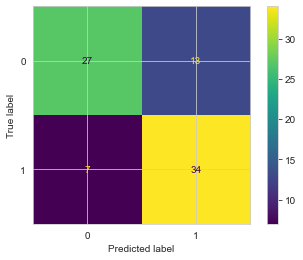

In [53]:
plot_confusion_matrix(grid, x_test, y_test)

In [54]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        40
           1       0.72      0.83      0.77        41

    accuracy                           0.75        81
   macro avg       0.76      0.75      0.75        81
weighted avg       0.76      0.75      0.75        81



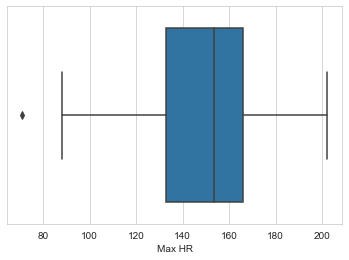

In [55]:
ax = sns.boxplot(x = hdp['Max HR'])

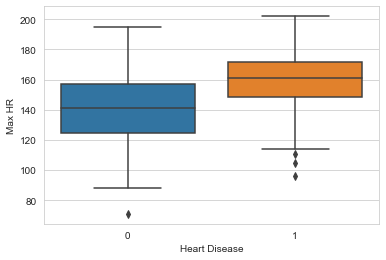

In [56]:
ax = sns.boxplot(x = hdp['Heart Disease'], y = hdp['Max HR'])

In [61]:
#outliers
print("Highest allowed",hdp['Heart Disease'].mean() + 3*hdp['Heart Disease'].std())
print("Lowest allowed",hdp['Heart Disease'].mean() - 3*hdp['Heart Disease'].std())

Highest allowed 2.049035810321404
Lowest allowed -0.937924699210293


In [64]:
hdp[(hdp['Heart Disease'] > 2.04) | (hdp['Heart Disease'] < -0.93)]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


In [65]:
new_hdp = hdp[(hdp['Heart Disease'] < 2.04) & (hdp['Heart Disease'] > -0.93)]
new_hdp

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,0
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [66]:
upper_limit = hdp['Heart Disease'].mean() + 3*hdp['Heart Disease'].std()
lower_limit = hdp['Heart Disease'].mean() - 3*hdp['Heart Disease'].std()

In [67]:
hdp['Heart Disease'] = np.where(
    hdp['Heart Disease']>upper_limit,
    upper_limit,
    np.where(
        hdp['Heart Disease']<lower_limit,
        lower_limit,
        hdp['Heart Disease']
    )
)

In [68]:
hdp['Heart Disease'].describe()

count    270.000000
mean       0.555556
std        0.497827
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Heart Disease, dtype: float64